<a href="https://colab.research.google.com/github/spalominor/SS202501/blob/main/SS_Taller06_21052025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pruebas de aleatoriedad

Para esta práctica se evaluará la aleatoriedad de las loterías tradicionales actuales usando un conjunto de resultados de los sorteos para premios mayores de las loterías de Colombia entre 2020 y 2024.  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Asignar el link de los datos publicados en la web
link = ("https://docs.google.com/spreadsheets/d/e/2PACX-1vQ5Z5RZLlKD43VEorWUt04"
        "gYeDey9aqBx54hSdC76SoZm6xKWOWvjpJ58poRbO4Pbxg0pkQjtwvtqFd/pub?gid=1074"
        "636163&single=true&output=csv")

# Cargar los datos desde un archivo CSV en un DataFrame
df_aleatorios = pd.read_csv(link)

# Mostrar estadísticas descriptivas de los datos originales
print(df_aleatorios.describe())


# Reemplazar valores mayores a 9999 por NaN
# Esto se hace para eliminar valores extremos fuera del rango aceptado
df_aleatorios[df_aleatorios > 9999] = np.nan

# Reemplazar valores menores a 0 por NaN
# Esto se hace para eliminar valores negativos no válidos
df_aleatorios[df_aleatorios < 0] = np.nan

# Eliminar cualquier fila que contenga al menos un valor NaN
df_aleatorios = df_aleatorios.dropna()

# Resetear índice para que sea secuencial 0,1,2,... N-1
df_aleatorios = df_aleatorios.reset_index(drop=True)

# Mostrar estadísticas descriptivas de los datos ya limpios
print(df_aleatorios.describe())

               6040
count   2672.000000
mean    4992.958084
std     2976.225648
min        1.000000
25%     2519.250000
50%     4925.500000
75%     7442.000000
max    40159.000000
              6040
count  2671.000000
mean   4979.792213
std    2897.912748
min       1.000000
25%    2518.500000
50%    4916.000000
75%    7439.500000
max    9996.000000


En primer momento podemos ver que estos números parecen seguir un comportamiento aleatorio. La media se acerca a 5000, y los cuantiles del 25%, 50% y 75% a 2500, 5000 y 7500 respectivamente

# Actividad parte 1

# Punto 1: Prueba de frecuencia de números pares / impares

In [3]:
# Obtener la cantidad total de filas del DataFrame
n = len(df_aleatorios)

# Crear una copia del DataFrame para trabajar solo con números impares
# Se aplica una máscara booleana que elimina los valores pares
df_impares = df_aleatorios[df_aleatorios % 2 != 0]

# Eliminar cualquier fila con al menos un valor NaN (producido por el filtrado)
df_impares = df_impares.dropna()

# Mostrar los datos que contienen solo números impares
print(df_impares)

# Calcular la cantidad de números impares
# Se cuenta cuántas filas quedaron luego del filtrado
impares = len(df_impares)

# Calcular la cantidad de números pares
# Es la diferencia con la longitud original
pares = n - impares

# Calcular el porcentaje de números pares
porcentaje_pares = pares / n * 100

# Calcular el porcentaje de números impares
porcentaje_impares = impares / n * 100

# Imprimir el conteo y porcentaje de números impares
print(f"Cantidad de números impares: {impares} - "
      f"{porcentaje_impares:.2f}%")

# Imprimir el conteo y porcentaje de números pares
print(f"Cantidad de números pares: {pares} - "
      f"{porcentaje_pares:.2f}%\n")

# Crear tabla de frecuencias de las observaciones
df_frecuencias = pd.DataFrame({
    'Categoría': ['Pares', 'Impares'],
    'Frecuencias': [pares, impares]
})

# Mostrar la tabla de frecuencias
print("Tabla de frecuencias. Números pares e impares observados")
df_frecuencias

        6040
0     4949.0
1     2773.0
2     9171.0
5     4885.0
8     9011.0
...      ...
2662  7135.0
2665  7727.0
2667  6731.0
2669  9223.0
2670  3455.0

[1319 rows x 1 columns]
Cantidad de números impares: 1319 - 49.38%
Cantidad de números pares: 1352 - 50.62%

Tabla de frecuencias. Números pares e impares observados


,Categoría,Frecuencias
0,Pares,1352
1,Impares,1319


**Prueba de Chi-Cuadrado para las frecuencias**

**Hipótesis nula (H₀):**

La proporción de números pares e impares es igual (50% - 50%).

**Hipótesis alternativa (H₁):**

La proporción de pares e impares no es igual a 50% - 50%.

In [4]:
# Calcular el estadístico de prueba
chisq = (pares - (n/2)) ** 2 / (n/2) + (impares - (n/2)) ** 2 / (n/2)

# Imprimir el valor del estadístico de prueba
print(f"El estadístico de prueba es: {chisq}")

# Definir los grados de libertad (gl)
gl = 1

# Definir el grado de significancia
alpha = 0.01

# Especificar el valor crítico
chisq_critico = 6.635

print(f"El valor crítico es: {chisq_critico}")
print(f"El valor de la significancia es: {100-alpha*100}%")
print(f"Los grados de libertad son: {gl}")

# Aceptar las hipótesis
if chisq < chisq_critico:
    print("No existe información para rechazar la hipótesis nula")
else:
    print("Se rechaza la hipótesis nula")

El estadístico de prueba es: 0.4077124672407338
El valor crítico es: 6.635
El valor de la significancia es: 99.0%
Los grados de libertad son: 1
No existe información para rechazar la hipótesis nula


**Conclusión:** La información apunta a que la proporción de números pares e impares es igual, 0.5 para cada una de las categorías.

# Punto 2: Pruebas de frecuencia para uniformidad

,Intervalo,Frecuencia Observada,Frecuencia Esperada
0,"(0, 1000]",264,267.1
1,"(1000, 2000]",279,267.1
2,"(2000, 3000]",262,267.1
3,"(3000, 4000]",283,267.1
4,"(4000, 5000]",274,267.1
5,"(5000, 6000]",231,267.1
6,"(6000, 7000]",285,267.1
7,"(7000, 8000]",250,267.1
8,"(8000, 9000]",259,267.1
9,"(9000, 10000]",284,267.1


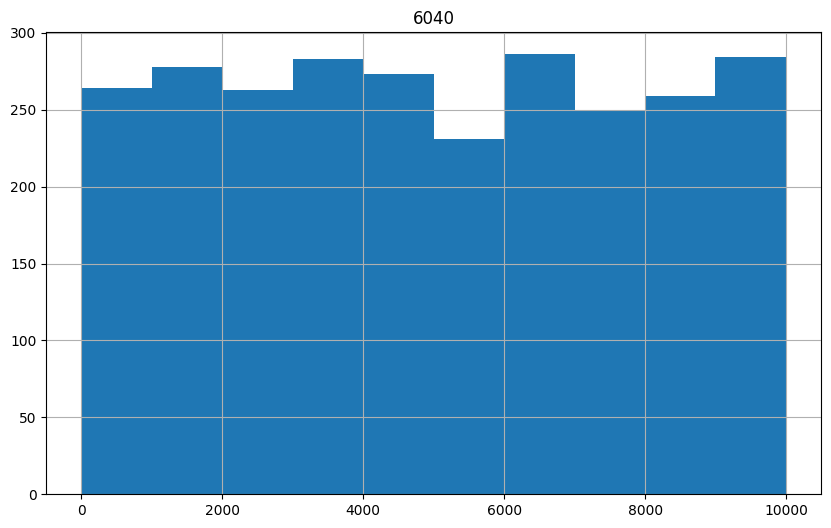

In [5]:
# Definir el número de categorías
k = 10

# Construir la lista de rangos usando un bucle
rangos = [0 + i * 1000 for i in range(k + 1)]

# Devolver la tabla de frecuencias por rango
# Dividir en 10 intervalos (bins) iguales
intervalos = pd.cut(df_aleatorios.iloc[:,0], bins=rangos)

# Contar cuántos valores hay en cada intervalo
frecuencias_obs = intervalos.value_counts().sort_index()

# Obtener la cantidad total de filas del DataFrame
n = len(df_aleatorios)

# Frecuencia esperada en una distribución uniforme
frecuencias_esp = pd.Series(n / k, index=frecuencias_obs.index)

# Crear un DataFrame con la tabla FO - FE
tabla_frecuencias = pd.DataFrame({
    "Intervalo": frecuencias_obs.index.astype(str),
    "Frecuencia Observada": frecuencias_obs.values,
    "Frecuencia Esperada": frecuencias_esp.values
})

# Crear un histograma de las observacion
histograma = df_aleatorios.hist(bins=k, figsize=(10, 6))

# Imprimir la tabla de frecuencias
tabla_frecuencias

Ahora procedamos con la prueba de bondad y ajuste Chi-Cuadrado para las frecuencias. Planteemos nuestras hipótesis:

**Hipótesis nula (H₀):**

La proporción de frecuencias es igual para todas las categorías

**Hipótesis alternativa (H₁):**

La proporción de frecuencias no es igual para todas las categorías


In [6]:
# Crear nuevos arreglos auxiliares
fo, fe = frecuencias_obs, frecuencias_esp

# Calcular el estadístico de prueba
chisq = np.sum((fo.values - fe.values) ** 2 / fe.values)

# Especificar los grados de libertad
gl = 9

# Especificar el nivel de significancia
alpha = 0.01

# Especificar el valor crítico
chisq_critico = 21.666

# Imprimir la información
print(f"El valor crítico es: {chisq_critico}")
print(f"El valor de la significancia es: {100-alpha*100}%")
print(f"Los grados de libertad son: {gl}")

# Aceptar las hipótesis
if chisq < chisq_critico:
    print("No existe información para rechazar la hipótesis nula")
else:
    print("Se rechaza la hipótesis nula")

El valor crítico es: 21.666
El valor de la significancia es: 99.0%
Los grados de libertad son: 9
No existe información para rechazar la hipótesis nula


# Punto 3: Prueba de rachas ascendentes/descendentes para independencia

Definamos una función capaz de calcular el número de corridas para el conjunto de datos.

In [7]:
# Seleccionar columna de datos para la prueba
serie = df_aleatorios.iloc[:, 0]

# Definir el número de observaciones
n = len(serie)
print(n)

# Crear el contador del número de rachas
# Siempre hay al menos una racha
rachas = 1
signo_anterior = 0

# Iterar cada posición de la lista
for i in range(1, n):
    # Calcular la diferencia entre el número y el anterior
    diff = serie[i] - serie[i - 1]
    # Evaluar cuál es el signo la racha y guardarlo
    signo_actual = int(diff > 0) - int(diff < 0)
    # Evaluar si la diferencia no es 0
    if signo_actual != 0:
        if signo_actual != signo_anterior and signo_anterior != 0:
            # Si el signo es diferente al anterior, y la diferencia no es 0
            # Aumentar el número de rachas en 1
            rachas += 1
        # Reasignar el signo anterior
        signo_anterior = signo_actual

# Imprimir el número de rachas calculadas
print(f"El número de rachas es: {rachas}")

2671
El número de rachas es: 1781


Procedamos con la prueba, planteando nuestras hipótesis:

**Hipótesis nula (H₀):**

Las observaciones sucesivas son independientes

**Hipótesis alternativa (H₁):**

Las observaciones sucesivas no son independientes

In [8]:
# Calcular media y desviación estándar teórica de rachas
media_teorica = (2 * n - 1) / 3
desviacion_estandar = np.sqrt((16 * n - 29) / 90)

# Calcular estadístico Z
Z = (rachas - media_teorica) / desviacion_estandar

# Establecer el valor crítico
valor_critico = 1.96

# Mostrar resultados y conclusión
print(f"Número de observaciones (N): {n}")
print(f"Número de rachas observadas: {rachas}")
print(f"Media teórica de rachas: {media_teorica:.2f}")
print(f"Desviación estándar teórica: {desviacion_estandar:.2f}")
print(f"Estadístico Z calculado: {Z:.2f}")
print(f"Nivel de significancia: {100-alpha*100}%")
print(f"Valor crítico para α=0.05: ±{valor_critico}\n")

# Aceptar las hipótesis
if abs(Z) < valor_critico:
    print("No existe información para rechazar la hipótesis nula")
else:
    print("Se rechaza la hipótesis nula")

Número de observaciones (N): 2671
Número de rachas observadas: 1781
Media teórica de rachas: 1780.33
Desviación estándar teórica: 21.78
Estadístico Z calculado: 0.03
Nivel de significancia: 99.0%
Valor crítico para α=0.05: ±1.96

No existe información para rechazar la hipótesis nula


Por lo que podemos concluir que no hay evidencia para asegurar dependencia entre las muestras.

# Punto 4: Prueba espectral (gráfica).


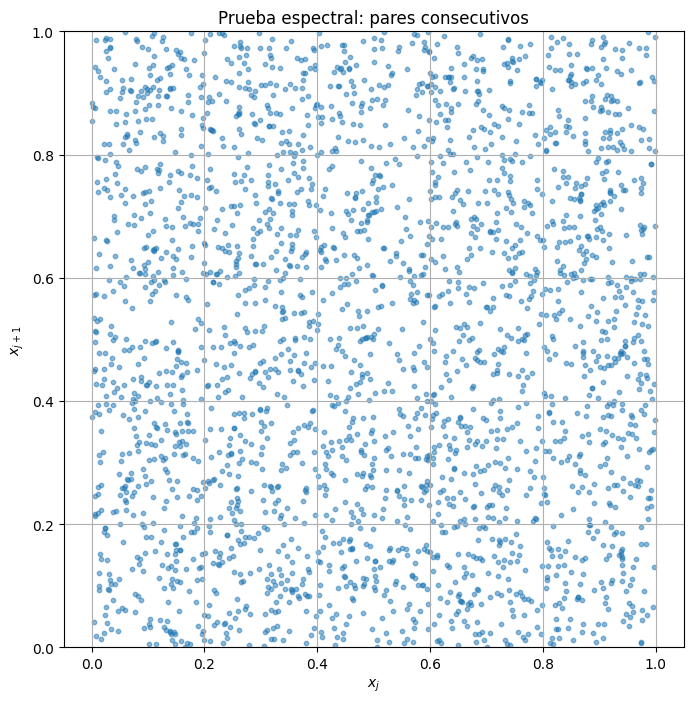

In [9]:
# Definir la normalización para convertir enteros a valores en [0,1)
m = 10000

# Extraer la primera columna del DataFrame como un array numpy
serie = df_aleatorios.iloc[:, 0].values

# Normalizar la secuencia dividiendo por m
xi = serie / m

# Crear pares consecutivos (x_j, x_{j+1})
pares_x = xi[:-1]  # Todos los valores excepto el último
pares_y = xi[1:]   # Todos los valores excepto el primero

# Crear la gráfica de dispersión
plt.figure(figsize=(8, 8))
plt.scatter(pares_x, pares_y, s=10, alpha=0.5)
plt.title('Prueba espectral: pares consecutivos')
plt.xlabel(r'$x_j$')
plt.ylabel(r'$x_{j+1}$')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

No observamos patrones dentro de la gráfica. Vemos que los puntos se distribuyen uniformemente dentro de la región. Podemos concluir que los números son aleatorios.

# Conclusión

Las pruebas de frecuencia, prueba espectral y las pruebas de uniformidad e independencia realizadas indican que la secuencia analizada presenta un comportamiento cercano al azar esperado. Sin patrones visibles ni dependencias significativas, los datos parecen adecuados para usos que requieren números pseudoaleatorios.

# Actividad parte 2

# Punto 1: Prueba de uniformidad Kolmogorov-Smirnov

Usando la función aleatorio() de excel, generar 20 observaciones de números aleatorios. Esta muestra es de menor tamaño que la muestra anterior por lo cual, para probar si estos números se distribuyen de manera uniforme, se puede realizar una prueba de Kolmogorov-Smirnov. Muestras de los números aleatorios a continuación:

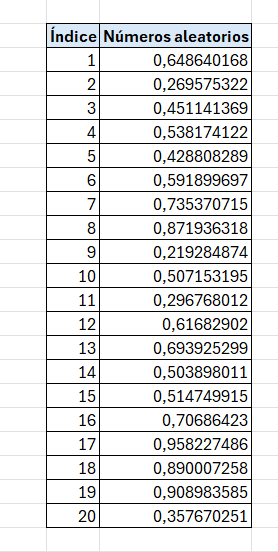

Importemos los datos procedientes del archivo de excel al cuaderno con Python

In [10]:
# Crear el dataframe con los números aleatorios de Excel
df_aleatorios_excel = pd.DataFrame([0.648640168, 0.269575322, 0.451141369,
                                 0.538174122, 0.428808289, 0.591899697,
                                 0.735370715, 0.871936318, 0.219284874,
                                 0.507153195, 0.296768012, 0.61682902,
                                 0.693925299, 0.503898011, 0.514749915,
                                 0.70686423, 0.958227486, 0.890007258,
                                 0.908983585, 0.357670251])

# Cambiar el nombre de la columna principal a "aleatorio"
df_aleatorios_excel.rename(columns={0: 'aleatorio'}, inplace=True)

# Mostrar el arreglo resultante
df_aleatorios_excel

,aleatorio
0,0.648640
1,0.269575
2,0.451141
3,0.538174
4,0.428808
5,0.591900
6,0.735371
7,0.871936
8,0.219285
9,0.507153


Continuando con la prueba, plateemos nuestras hipótesis:

**Hipótesis nula (H₀):**

Las muestras se distribuyen uniformemente

**Hipótesis alternativa (H₁):**

Las muestras no se distribuyen uniformemente

Nota: El nivel de significancia es del 95% (α = 0.05)

Grafiquemos la función de probabilidad acumulada de nuestra muestra y de una distribución uniforme.

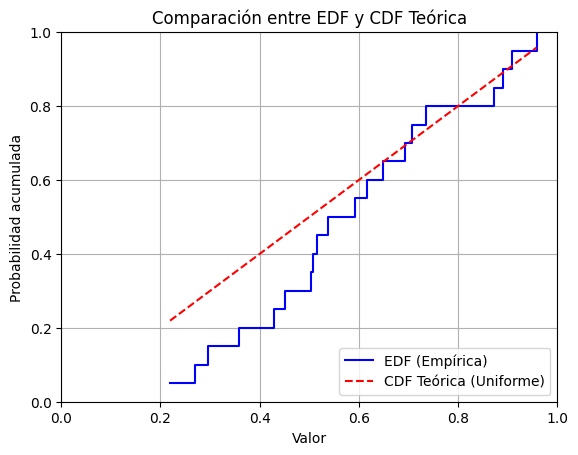

,aleatorio,EDF,CDF_teorica
0,0.219285,0.05,0.219285
1,0.269575,0.10,0.269575
2,0.296768,0.15,0.296768
3,0.357670,0.20,0.357670
4,0.428808,0.25,0.428808
5,0.451141,0.30,0.451141
6,0.503898,0.35,0.503898
7,0.507153,0.40,0.507153
8,0.514750,0.45,0.514750
9,0.538174,0.50,0.538174


In [11]:
# Ordenar los datos de menor a mayor
df_aleatorios_excel.sort_values(by='aleatorio', inplace=True)

# Resetear los índices tras ordenar
df_aleatorios_excel.reset_index(drop=True, inplace=True)

# Calcular el tamaño de la muestra
n = len(df_aleatorios_excel)

# Calcular la función de distribución empírica EDF(x) = i/n
df_aleatorios_excel['EDF'] = np.arange(1, n + 1) / n

# Calcular la CDF teórica para la distribución uniforme F(x) = x
df_aleatorios_excel['CDF_teorica'] = df_aleatorios_excel['aleatorio']

# Graficar la función de distribución empírica (EDF)
plt.step(df_aleatorios_excel['aleatorio'], df_aleatorios_excel['EDF'],
         where='post', label='EDF (Empírica)', color='blue')

# Graficar la función de distribución teórica F(x) = x
plt.plot(df_aleatorios_excel['aleatorio'], df_aleatorios_excel['CDF_teorica'],
         label='CDF Teórica (Uniforme)', color='red', linestyle='--')

# Establecer límites de los ejes para ir de 0 a 1
plt.xlim(0, 1)
plt.ylim(0, 1)

# Añadir etiquetas y leyenda
plt.title('Comparación entre EDF y CDF Teórica')
plt.xlabel('Valor')
plt.ylabel('Probabilidad acumulada')
plt.legend(loc='lower right')
plt.grid(True)

# Mostrar la gráfica
plt.show()

# Mostrar la tabla con los valores de la fda
df_aleatorios_excel

Proseguimos calculando las diferencias entre la distribución empírica y teórica.

In [12]:
# Calcular EDF(x) = i / n
df_aleatorios_excel['EDF'] = np.arange(1, n + 1) / n

# Calcular EDF(x⁻) = (i - 1) / n
df_aleatorios_excel['EDF_anterior'] = np.arange(0, n) / n

# Calcular la CDF teórica F(x) = x
df_aleatorios_excel['CDF_teorica'] = df_aleatorios_excel['aleatorio']

# Calcular D⁺ = EDF(x) - F(x)
df_aleatorios_excel['D_mas'] = df_aleatorios_excel[
    'EDF'] - df_aleatorios_excel['CDF_teorica']

# Calcular D⁻ = F(x) - EDF(x⁻)
df_aleatorios_excel['D_menos'] = df_aleatorios_excel['CDF_teorica'] - \
                           df_aleatorios_excel['EDF_anterior']

# Seleccionar los D+ y D⁻
d_mas = df_aleatorios_excel['D_mas'].max()
d_menos = df_aleatorios_excel['D_menos'].max()

# Imprimir los D+ y D⁻
print(f"D⁺  = {d_mas:.2f}")
print(f"D⁻  = {d_menos:.2f}")

# Mostrar el arreglo con las nuevas columnas
df_aleatorios_excel

D⁺  = 0.06
D⁻  = 0.23


,aleatorio,EDF,CDF_teorica,EDF_anterior,D_mas,D_menos
0,0.219285,0.05,0.219285,0.00,-0.169285,0.219285
1,0.269575,0.10,0.269575,0.05,-0.169575,0.219575
2,0.296768,0.15,0.296768,0.10,-0.146768,0.196768
3,0.357670,0.20,0.357670,0.15,-0.157670,0.207670
4,0.428808,0.25,0.428808,0.20,-0.178808,0.228808
5,0.451141,0.30,0.451141,0.25,-0.151141,0.201141
6,0.503898,0.35,0.503898,0.30,-0.153898,0.203898
7,0.507153,0.40,0.507153,0.35,-0.107153,0.157153
8,0.514750,0.45,0.514750,0.40,-0.064750,0.114750
9,0.538174,0.50,0.538174,0.45,-0.038174,0.088174


Continuemos calculando el estadístico de prueba D

In [13]:
# Calcular el estadístico D como el mayor de los dos anteriores
d = max(d_mas, d_menos)

# Imprimir los valores intermedios y el estadístico de prueba
print(f"D⁺  = {d_mas:.2f}")
print(f"D⁻  = {d_menos:.2f}")
print(f"Estadístico D = {d:.2f}")

D⁺  = 0.06
D⁻  = 0.23
Estadístico D = 0.23


Vamos a comparar el estadístico con el valor crítico

In [14]:
# Nivel de significancia
alpha = 0.05

# Calcular el valor crítico para α = 0.05
d_critico = 1.36 / np.sqrt(n)

# Imprimir el valor crítico
print(f"Valor crítico (α = {alpha}): D_crit = {d_critico:.5f}")

# Comparar D con el valor crítico
# Aceptar las hipótesis
if d < d_critico:
    print("No existe información para rechazar la hipótesis nula")
else:
    print("Se rechaza la hipótesis nula")

Valor crítico (α = 0.05): D_crit = 0.30411
No existe información para rechazar la hipótesis nula


Los números puede que se distribuyan uniformemente

# Conclusión

La prueba de Kolmogorov-Smirnov es una herramienta estadística que permite evaluar si una muestra proviene de una distribución específica, en este caso, la distribución uniforme en el intervalo (0,1). Funciona comparando la función de distribución acumulada empírica de la muestra con la función de distribución acumulada teórica esperada. En resumen, la prueba Kolmogorov-Smirnov es un método efectivo y flexible para evaluar la aleatoriedad y la adecuación de una muestra a una distribución dada.